In [1]:
import pandas as pd
from os import path
%pylab inline
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

Populating the interactive namespace from numpy and matplotlib


In [2]:
snapshot_dir = '/home/maximilianklein/snapshot_data/'

In [3]:
lssnaps = !ls $snapshot_dir

In [4]:
snapdirs = [snap for snap in lssnaps if snap[0].isdigit()]

In [5]:
all_genders = set()
#find the genders
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath).fillna(0)
    snap_genders = sldf.columns
    for g in snap_genders: 
        if g.endswith('1'):
            print sitelinkspath
        all_genders.add(g)

In [6]:
#populate a dict with numbers:
longitudinal_totals = {}
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    snap_genders = sldf.columns
    gendersum = sldf.sum()
    longitudinal_totals[snapdir] = gendersum


In [7]:
ldf = pd.DataFrame.from_dict(longitudinal_totals,orient='index').fillna(0)

In [8]:
ldf.columns

Index([u'nan', u'transgender female', u'intersex', u'fa'afafine', u'transgender', u'Gender fluid', u'transgender male', u'Male', u'female creature', u'male creature', u'woman', u'genderqueer', u'female', u'male', u'Perreología', u'kathoey', u'man', u'Daisy', u'gay', u'Alien', u'diplomat', u'cheetah', u'Turkish', u'human', u'Solanum tuberosum', u'Female', u'queer', u'Femenia', u'Messi', u'American football player', u'sociologist', u'homosexuality', u'Marico', u'The Football Association', u'breast', u'Unknown', u'Wikimedia duplicated page'], dtype='object')

In [9]:
ldf.index = pd.to_datetime(ldf.index)

In [10]:
ldf['total'] = ldf.sum(axis=1)

In [11]:
ldf['total']

2014-09-17    5869606
2014-10-13    6589799
2015-07-28    6589799
2015-08-03    6589799
2015-08-09    6609617
2015-08-12    6617934
2015-08-16    6617934
2015-08-21    6630052
2015-08-23    6630052
2015-09-06    6656076
2015-09-13    6680340
2015-09-20    6698141
2015-09-27    6714732
2015-10-13    6763390
2015-10-19    6763390
2015-10-26    6807585
2015-11-02    6824561
2015-11-09    6851235
2015-11-21    6876328
2015-11-22    6876328
2015-11-23    6901147
2015-12-04    6929623
2015-12-21    6987464
2016-01-03    6999542
Name: total, dtype: float64

In [12]:
ldf['ungendered'] = ldf['nan'] / ldf['total']

In [13]:
ldf['gender'] = 1 - ldf['ungendered']

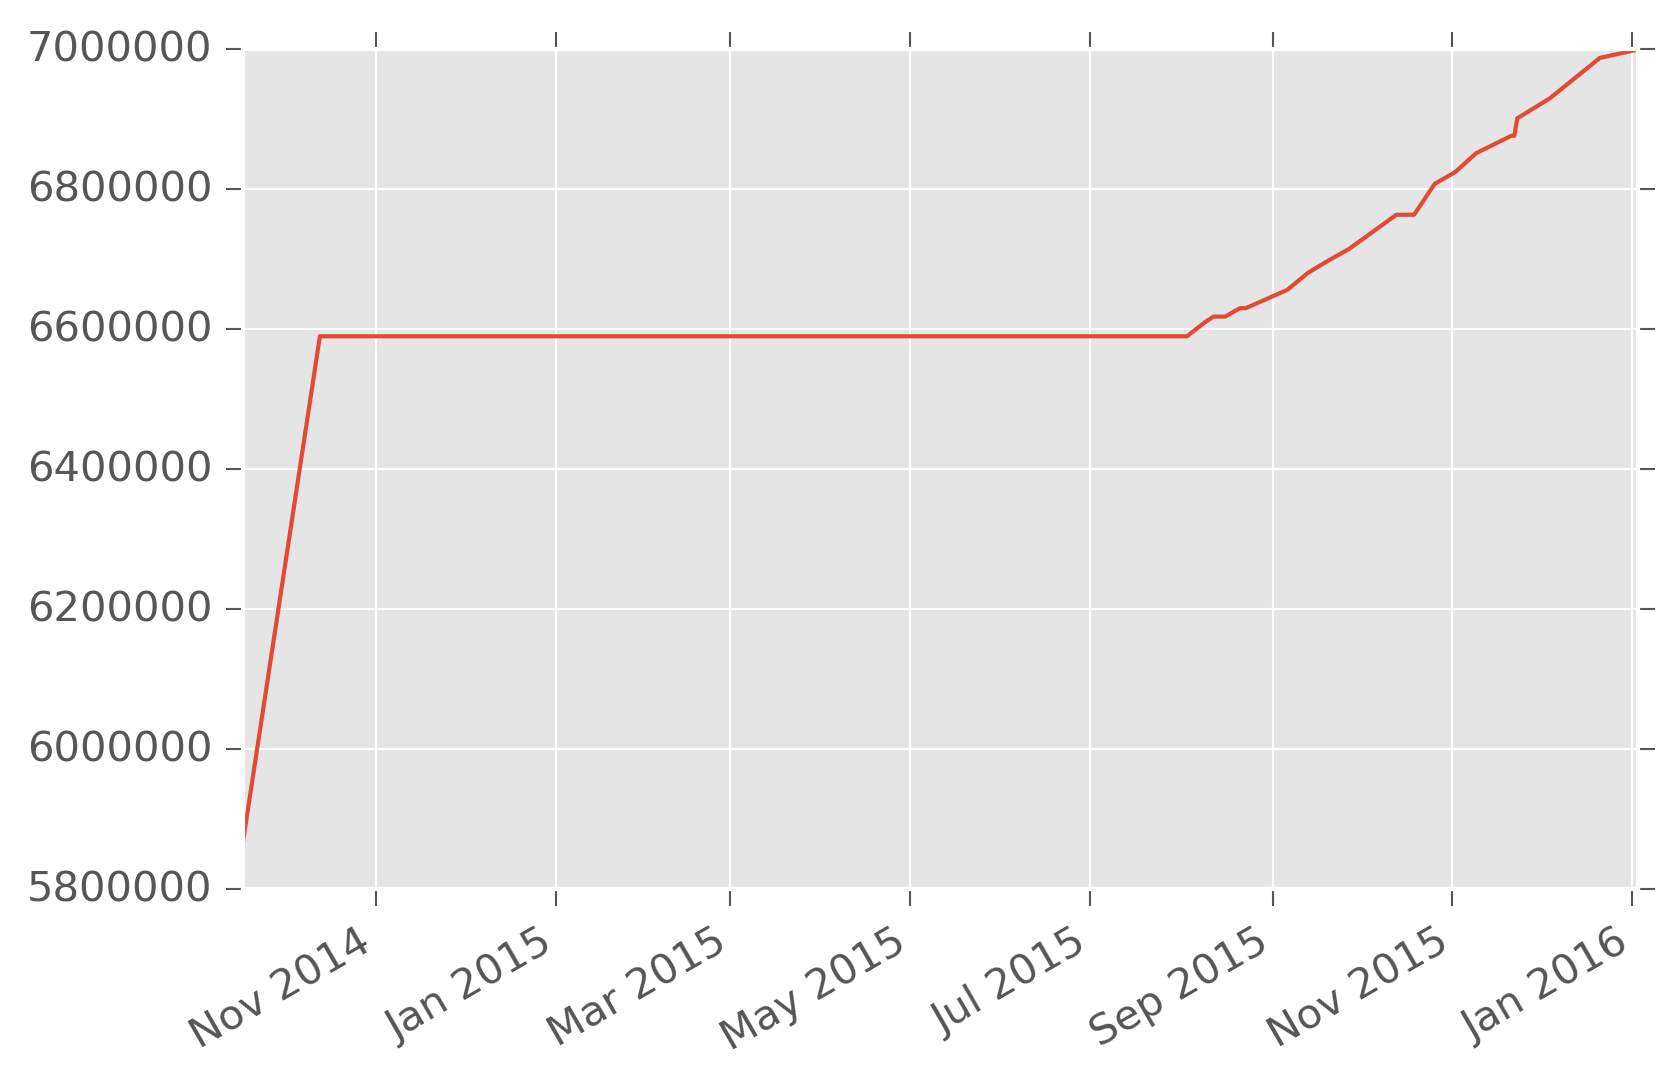

In [14]:
ldf['total'].plot()

In [175]:
ldf['total']

2014-09-17    5869606
2014-10-13    6589799
2015-07-28    6589799
2015-08-03    6589799
2015-08-09    6609617
2015-08-12    6617934
2015-08-16    6617934
2015-08-21    6630052
2015-08-23    6630052
2015-09-06    6656076
2015-09-13    6680340
2015-09-20    6698141
2015-09-27    6714732
2015-10-13    6763390
2015-10-19    6763390
2015-10-26    6807585
2015-11-02    6824561
2015-11-09    6851235
2015-11-21    6876328
2015-11-22    6876328
2015-11-23    6901147
2015-12-04    6929623
2015-12-21    6987464
2016-01-03    6999542
Name: total, dtype: float64

In [15]:
r_total = pd.rolling_mean(ldf['total'], 2, 1)

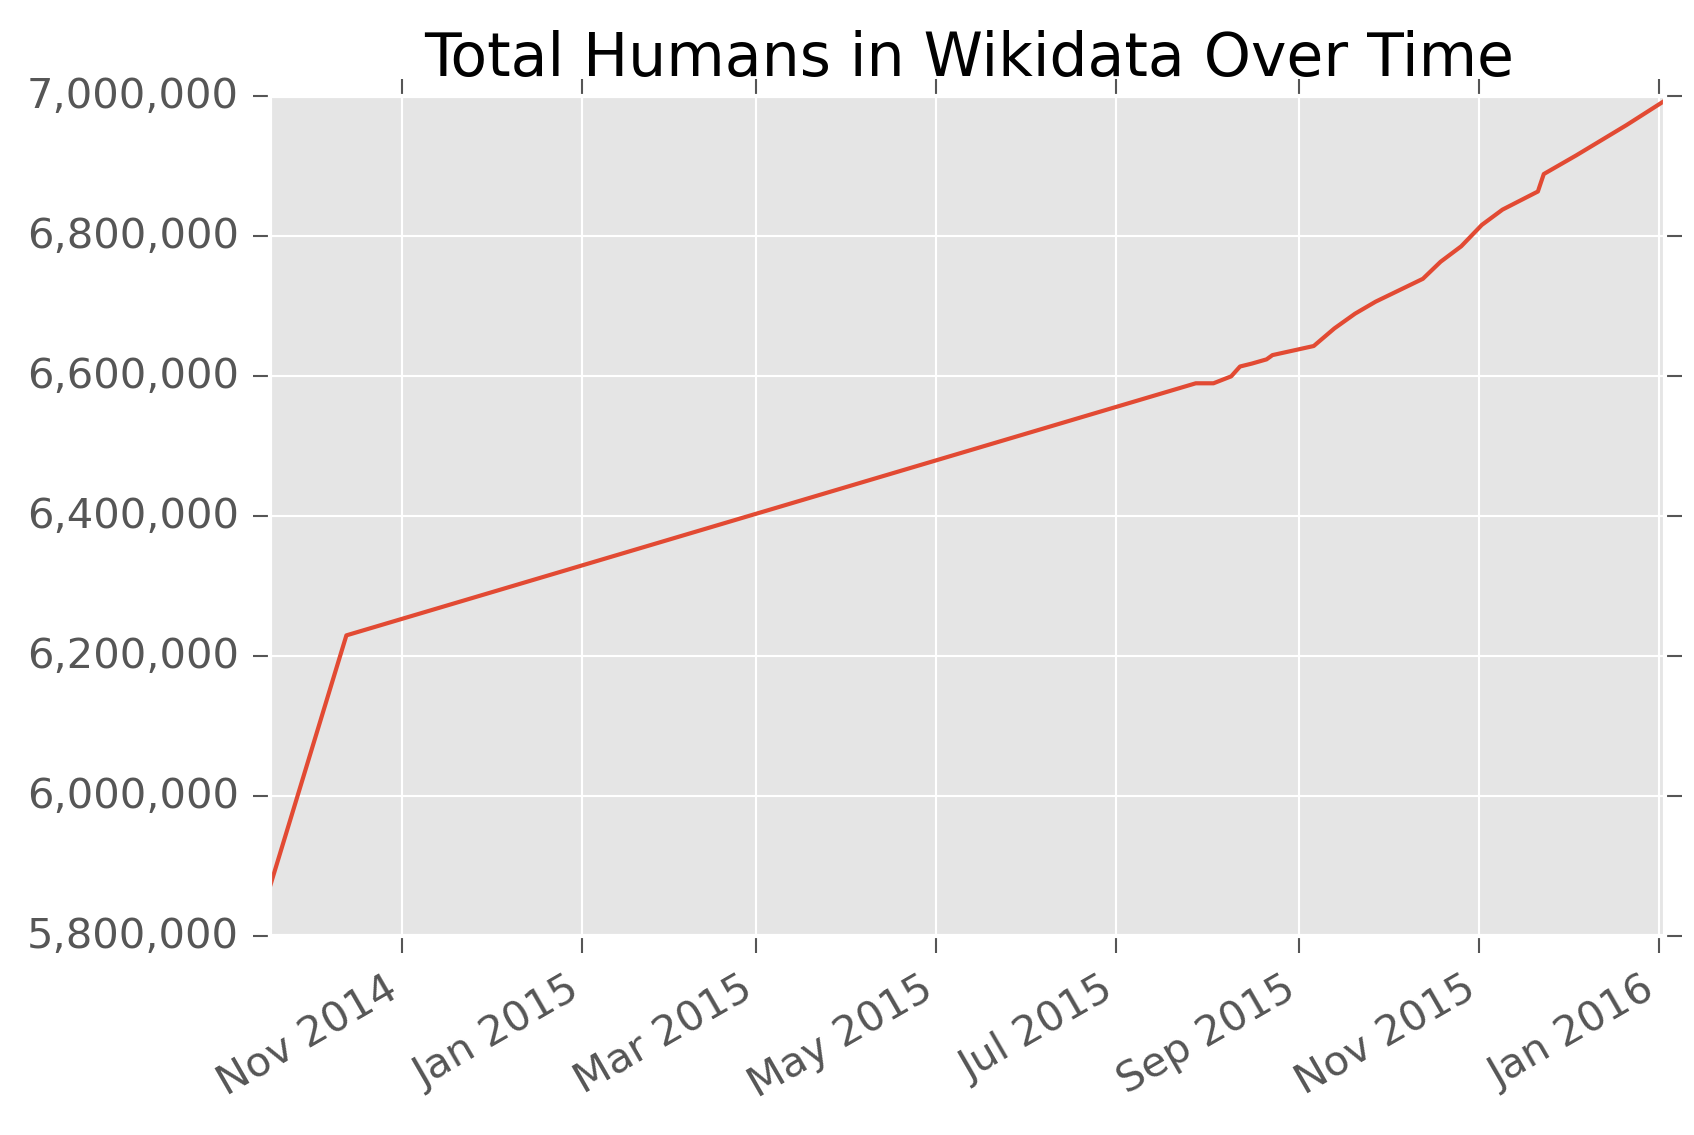

In [24]:
ax = r_total.plot(title="Total Humans in Wikidata Over Time")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

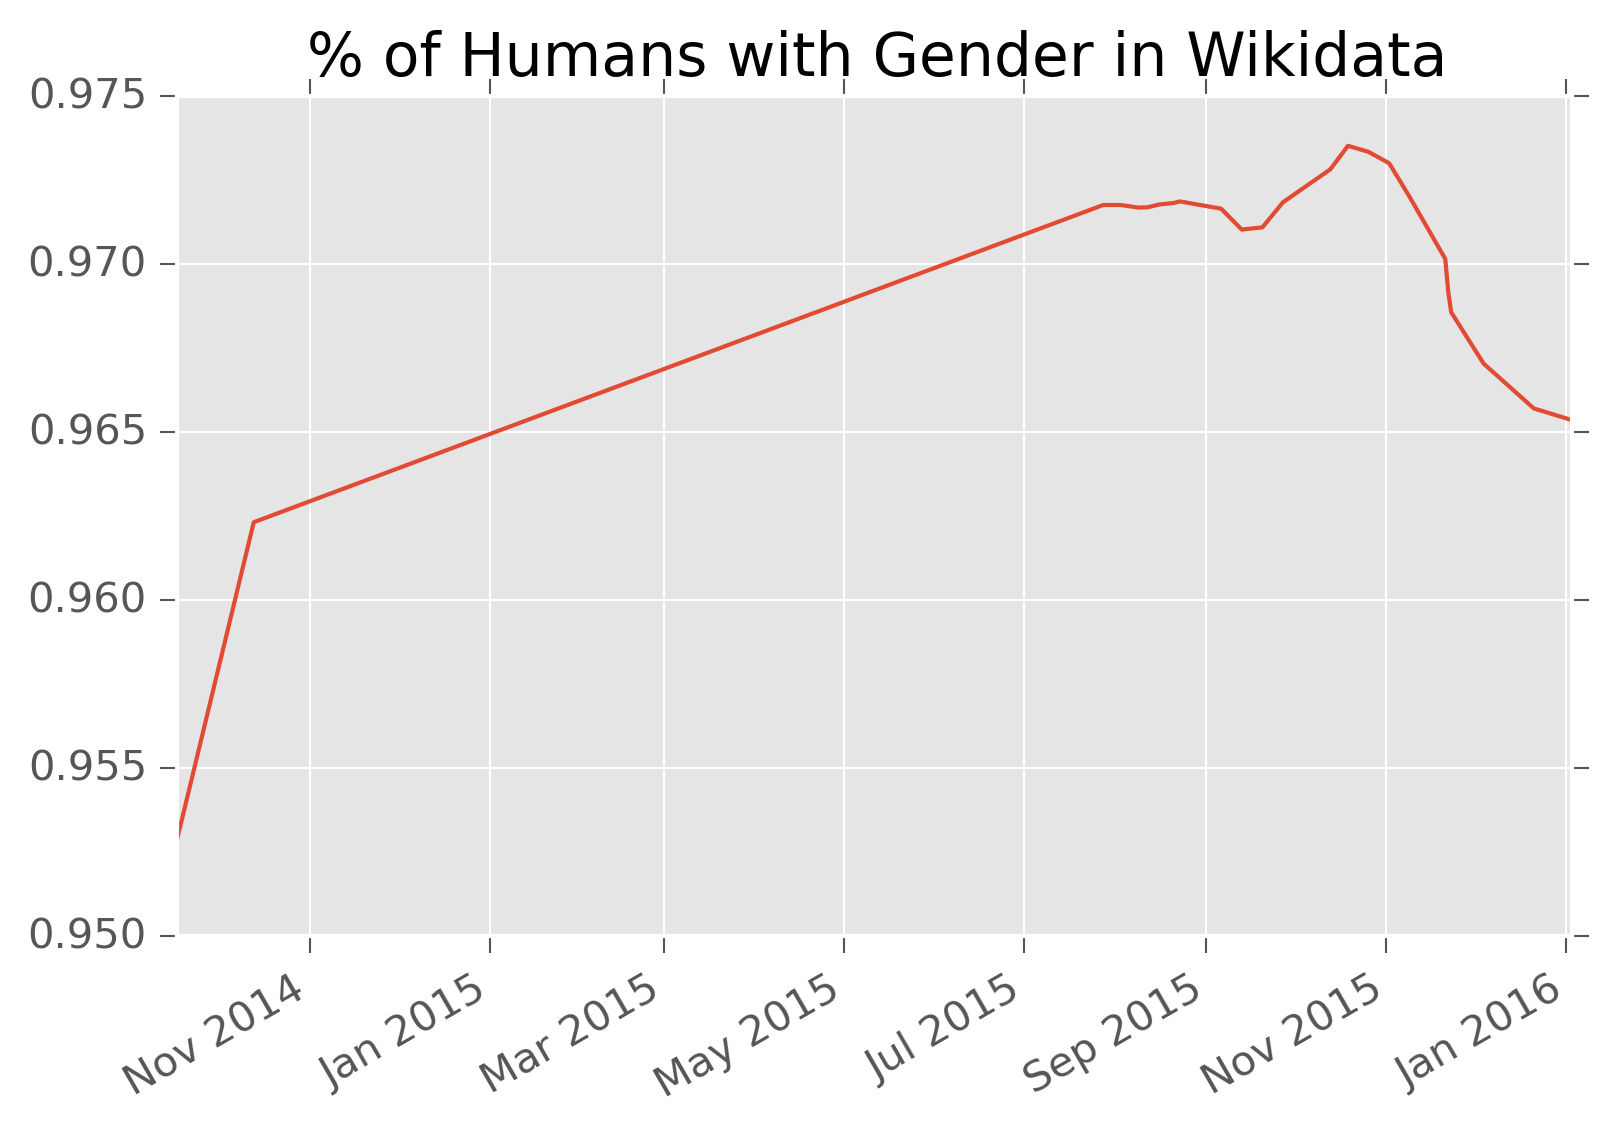

In [17]:
r_gendered = pd.rolling_mean(ldf['gender'], 2, 1)
r_gendered.plot(title="% of Humans with Gender in Wikidata")

In [18]:
#populate a dict with numbers:
longitudinal_countrys = {}
longitudinal_citizenships = {}
longitudinal_egs = {}
longitudinal_sites = {}


dict_csv_map = { 'place_of_births-index.csv': longitudinal_countrys,
'citizenships-index.csv' : longitudinal_citizenships,
'ethnic_groups-index.csv': longitudinal_egs,
'site_linkss-index.csv': longitudinal_sites}

for snapdir in snapdirs:
    for csvtype, longitudinal_dict in dict_csv_map.iteritems():
        sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes',csvtype)
        cdf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
        csum = cdf.sum()
        total = csum.sum()
        nothaving = cdf.ix[0].sum()
        having = total - nothaving
        having_per = having / float(total)
        longitudinal_dict[snapdir] = having_per

In [19]:
citdf = pd.DataFrame.from_dict(longitudinal_citizenships,orient='index').fillna(0)
citdf.columns = ['citizenship']
countrydf = pd.DataFrame.from_dict(longitudinal_countrys,orient='index').fillna(0)
countrydf.columns = ['place of birth']
egdf = pd.DataFrame.from_dict(longitudinal_egs,orient='index').fillna(0)
egdf.columns = ['ethnic group']
sitedf = pd.DataFrame.from_dict(longitudinal_sites,orient='index').fillna(0)
sitedf.columns = ['at least 1 site link']


In [20]:
aggdf = citdf.join(countrydf).join(egdf).join(sitedf).join(ldf['gender'])

In [184]:
aggdf.index = pd.to_datetime(aggdf.index)

In [187]:
aggdf.head(24)

,citizenship,place of birth,ethnic group,at least 1 site link,gender
2015-08-09,0.560887,0.266321,0.003396,0.989634,0.971606
2015-08-23,0.561927,0.276930,0.003561,0.989528,0.971867
2015-08-21,0.561927,0.276930,0.003561,0.989528,0.971867
2015-08-03,0.560040,0.266263,0.003391,0.989771,0.971760
2015-10-13,0.578089,0.291084,0.003584,0.989097,0.973522
2016-01-03,0.582185,0.305102,0.005559,0.981463,0.965416
2014-09-17,0.428217,0.240124,0.003109,0.996164,0.952879
2015-12-04,0.575444,0.291580,0.005109,0.982407,0.966120
2015-12-21,0.581477,0.303596,0.005413,0.981570,0.965295
2015-09-13,0.571644,0.284418,0.003554,0.989358,0.970622


In [182]:
aggdf.ix

,citizenship,place of birth,ethnic group,at least 1 site link,gender
2015-08-09,0.560887,0.266321,0.003396,0.989634,0.971606
2015-08-23,0.561927,0.276930,0.003561,0.989528,0.971867


In [188]:
print aggdf.ix[[6,5],:].to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &  citizenship &  place of birth &  ethnic group &  at least 1 site link &    gender \\
\midrule
2014-09-17 &     0.428217 &        0.240124 &      0.003109 &              0.996164 &  0.952879 \\
2016-01-03 &     0.582185 &        0.305102 &      0.005559 &              0.981463 &  0.965416 \\
\bottomrule
\end{tabular}



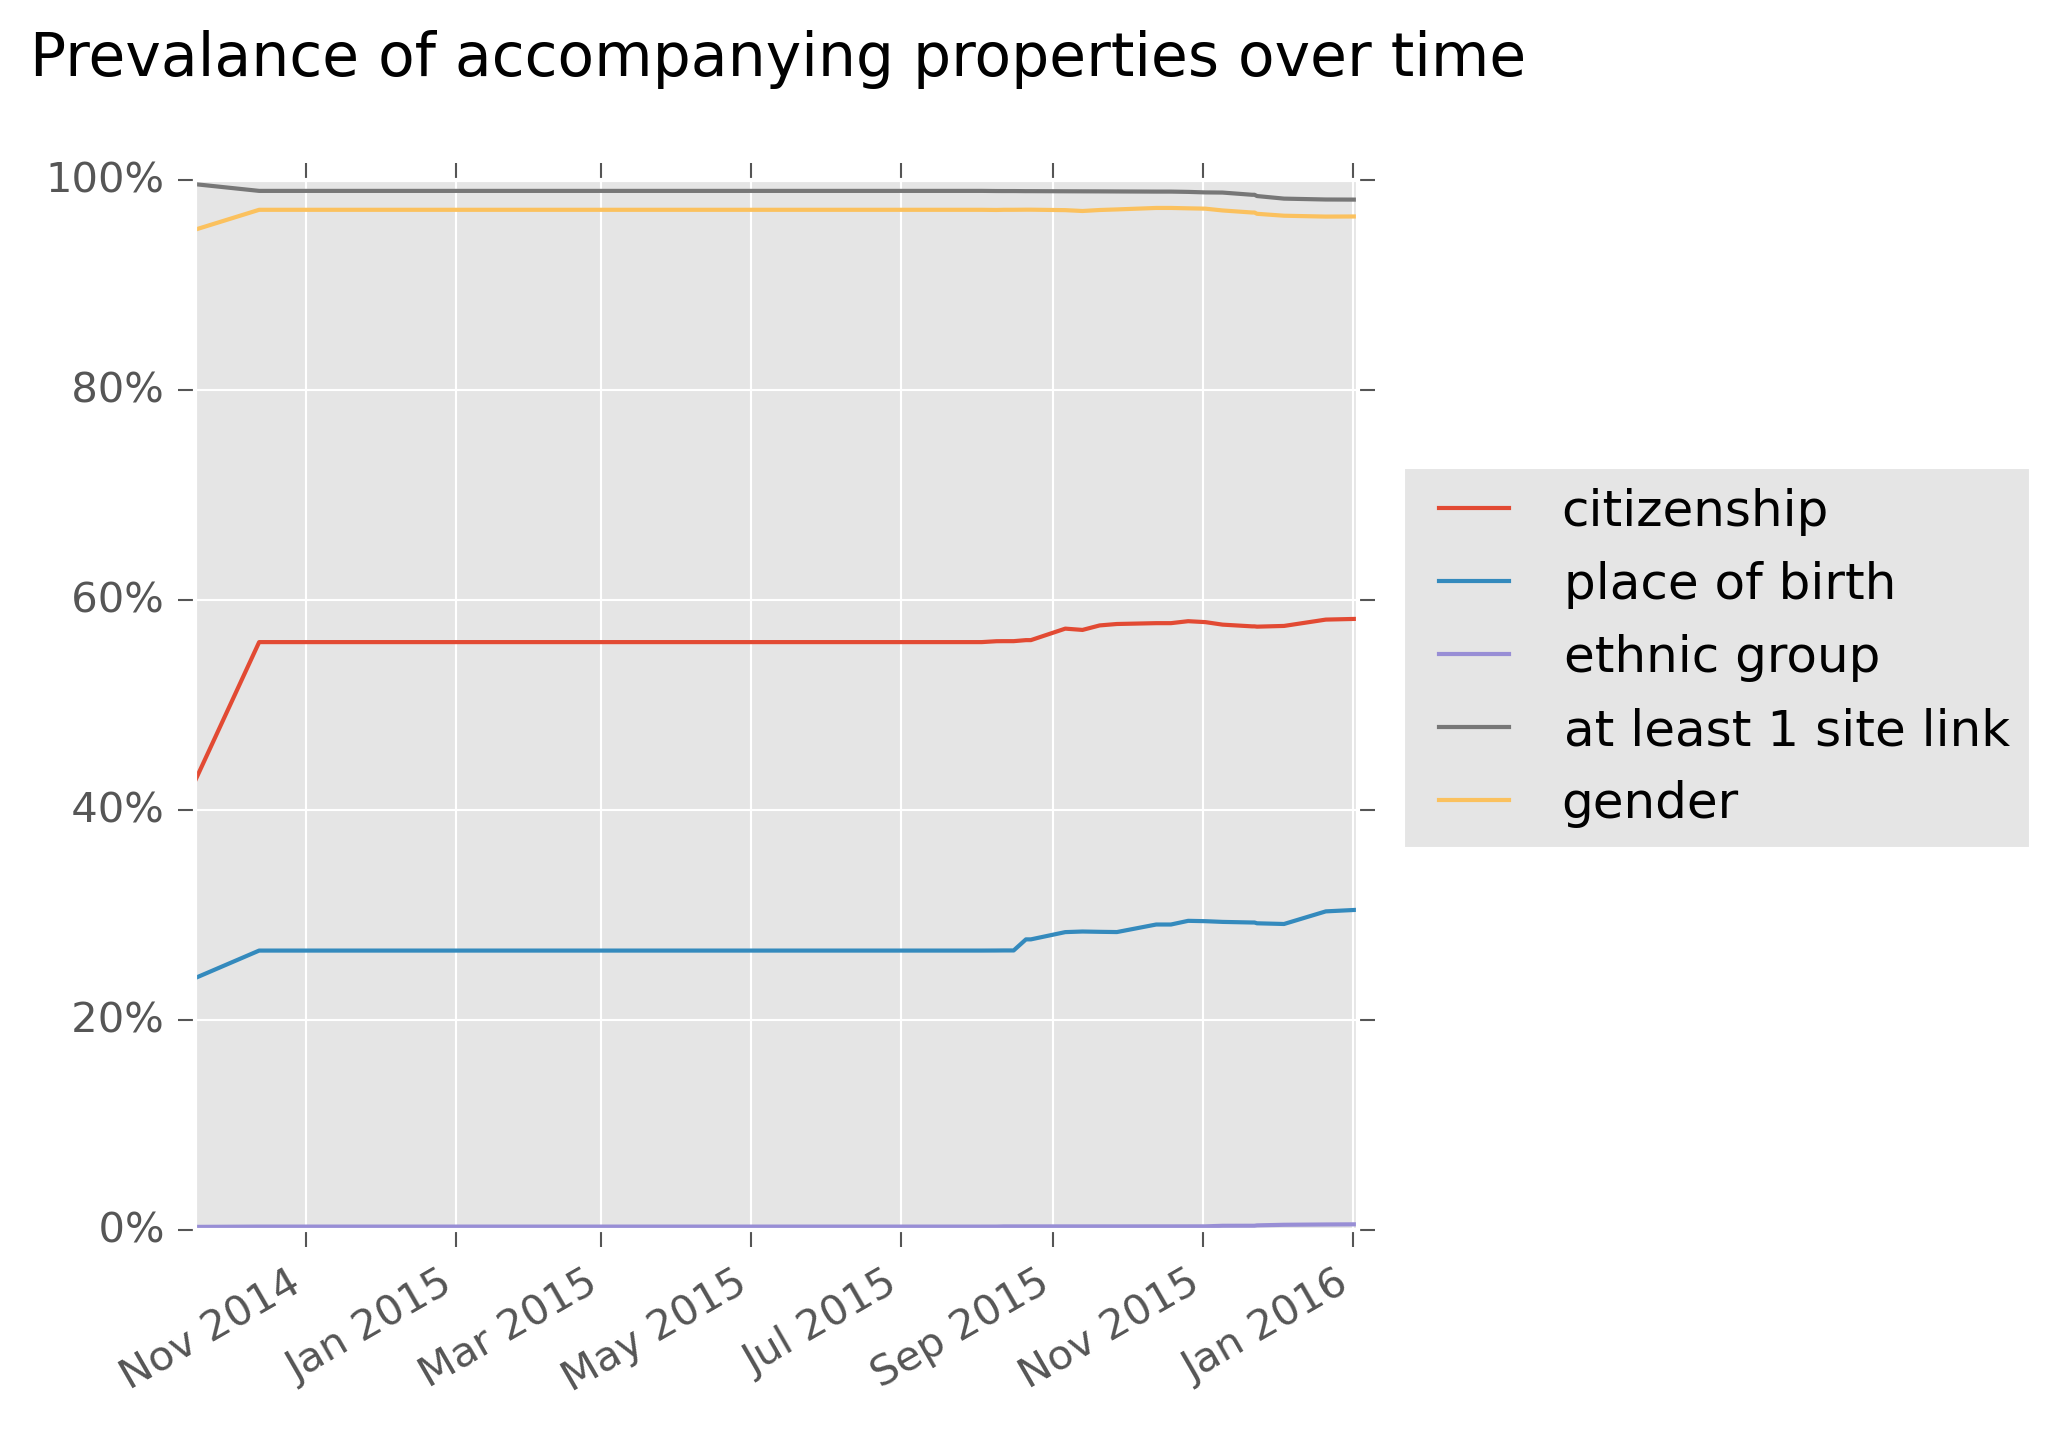

In [23]:
r_aggdf = pd.rolling_mean(aggdf, 2,1)
ax = aggdf.plot( figsize = (5,5))
title("Prevalance of Accompanying Properties Over Time", y = 1.08)
legend(bbox_to_anchor=(1.6,0.75))
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# FRB over time

In [30]:
ldf['female%'] = ldf['female'] / ldf['total']

In [31]:
ldf['nonbinary'] = ldf['total'] - ldf['female'] - ldf['male']
ldf['nonbinary%'] = ldf['nonbinary'] / ldf['total']

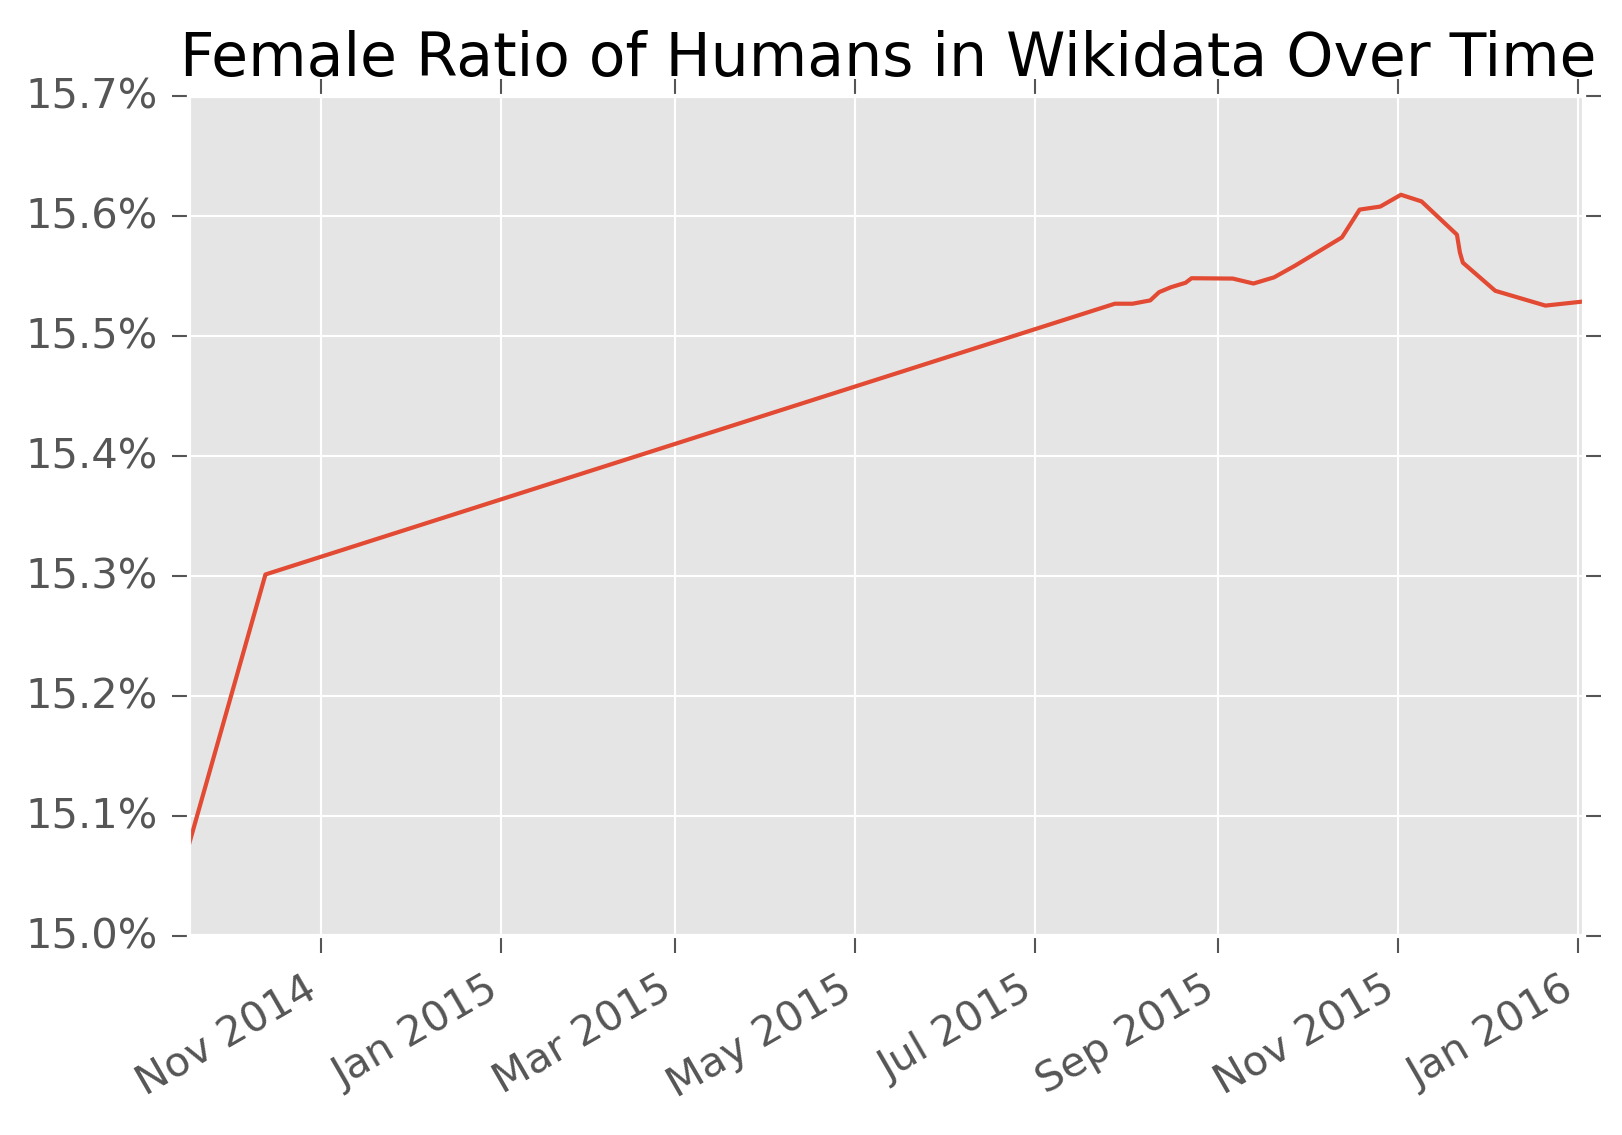

In [42]:
r_femper = pd.rolling_mean(ldf['female%'], 2, 1)
ax =r_femper.plot()
title('Female Ratio of Humans in Wikidata Over Time')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])

In [55]:
ldf['time'] = ldf.index

In [56]:
ldf['timesince'] = ldf['time'] - ldf['time'].ix[0]

In [66]:
ldf['dayssince'] = ldf['timesince'].dt.days

In [70]:
from pandas.stats.api import ols
result = ols(y=ldf['female%'], x=ldf['dayssince'])

In [100]:
result.beta

x            0.000006
intercept    0.153167
dtype: float64

In [79]:
ldf['femper'] = ldf['female%']
ldf['constant'] = 1

In [82]:
import statsmodels.formula.api as sm
smresult = sm.ols(formula="femper ~ dayssince", data=ldf).fit()

In [83]:
smresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 femper   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     20.67
Date:                Tue, 05 Jan 2016   Prob (F-statistic):           0.000159
Time:                        16:29:59   Log-Likelihood:                 139.51
No. Observations:                  24   AIC:                            -275.0
Df Residuals:                      22   BIC:                            -272.7
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1532      0.001    301.100      0.000         0.152     0.154
dayssince   6.242e-06   1.37e-06      4.547      0.000      3.39e-06  9.09e-06
==============================================================================
Omnibus:                       13.487   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.884
Skew:                          -0.843   Prob(JB):                     1.07e-05
Kurtosis:                       7.477   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
#populate a dict with numbers:
longitudinal_langs = {}
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    sldf['total'] = sldf.sum(axis=1)
    sldf['femper'] = sldf['female'] / sldf['total']
    retseries = sldf['femper'][sldf['total']>10000]
    longitudinal_langs[snapdir] = retseries

In [159]:
langdf = pd.DataFrame.from_dict(longitudinal_langs, orient='index')

In [160]:
langdf.dropna(axis=1, how='any')

,nan,arwiki,azwiki,bewiki,bgwiki,cawiki,commonswiki,cswiki,dawiki,dewiki,...,slwiki,srwiki,svwiki,tawiki,thwiki,tlwiki,trwiki,ukwiki,viwiki,zhwiki
2014-09-17,0.165423,0.128928,0.131474,0.105307,0.146228,0.116249,0.188912,0.154508,0.155906,0.149411,...,0.068502,0.171149,0.197613,0.117572,0.204176,0.279326,0.131508,0.136901,0.142910,0.137898
2014-10-13,0.186117,0.123957,0.094293,0.108296,0.148696,0.112886,0.196045,0.155131,0.155527,0.150655,...,0.089955,0.183886,0.198135,0.120927,0.172473,0.297854,0.135699,0.132512,0.141588,0.136322
2015-07-28,0.186117,0.123957,0.094293,0.108296,0.148696,0.112886,0.196045,0.155131,0.155527,0.150655,...,0.089955,0.183886,0.198135,0.120927,0.172473,0.297854,0.135699,0.132512,0.141588,0.136322
2015-08-03,0.186117,0.123957,0.094293,0.108296,0.148696,0.112886,0.196045,0.155131,0.155527,0.150655,...,0.089955,0.183886,0.198135,0.120927,0.172473,0.297854,0.135699,0.132512,0.141588,0.136322
2015-08-09,0.185354,0.124287,0.094265,0.108219,0.148860,0.113174,0.199256,0.155202,0.155681,0.150725,...,0.090003,0.183742,0.198180,0.120847,0.172857,0.298121,0.135843,0.132596,0.141768,0.136776
2015-08-12,0.185484,0.124350,0.094633,0.108163,0.148868,0.113337,0.200047,0.155030,0.155697,0.150796,...,0.090077,0.183719,0.198229,0.120833,0.173107,0.297852,0.136172,0.132634,0.141904,0.136972
2015-08-16,0.185484,0.124350,0.094633,0.108163,0.148868,0.113337,0.200047,0.155030,0.155697,0.150796,...,0.090077,0.183719,0.198229,0.120833,0.173107,0.297852,0.136172,0.132634,0.141904,0.136972
2015-08-21,0.184773,0.124578,0.096119,0.107900,0.148925,0.113517,0.199790,0.155118,0.154744,0.150881,...,0.090031,0.183482,0.198234,0.120690,0.175367,0.299033,0.136713,0.132487,0.142408,0.137294
2015-08-23,0.184773,0.124578,0.096119,0.107900,0.148925,0.113517,0.199790,0.155118,0.154744,0.150881,...,0.090031,0.183482,0.198234,0.120690,0.175367,0.299033,0.136713,0.132487,0.142408,0.137294
2015-09-06,0.185182,0.125399,0.096493,0.107460,0.149462,0.113783,0.198125,0.155412,0.154335,0.150958,...,0.090098,0.183083,0.198290,0.121071,0.175285,0.298867,0.136973,0.132342,0.142555,0.137378


In [161]:
langdf.index = pd.to_datetime(langdf.index)

In [167]:
yeardiff = langdf.ix[-1] - langdf.ix[0]

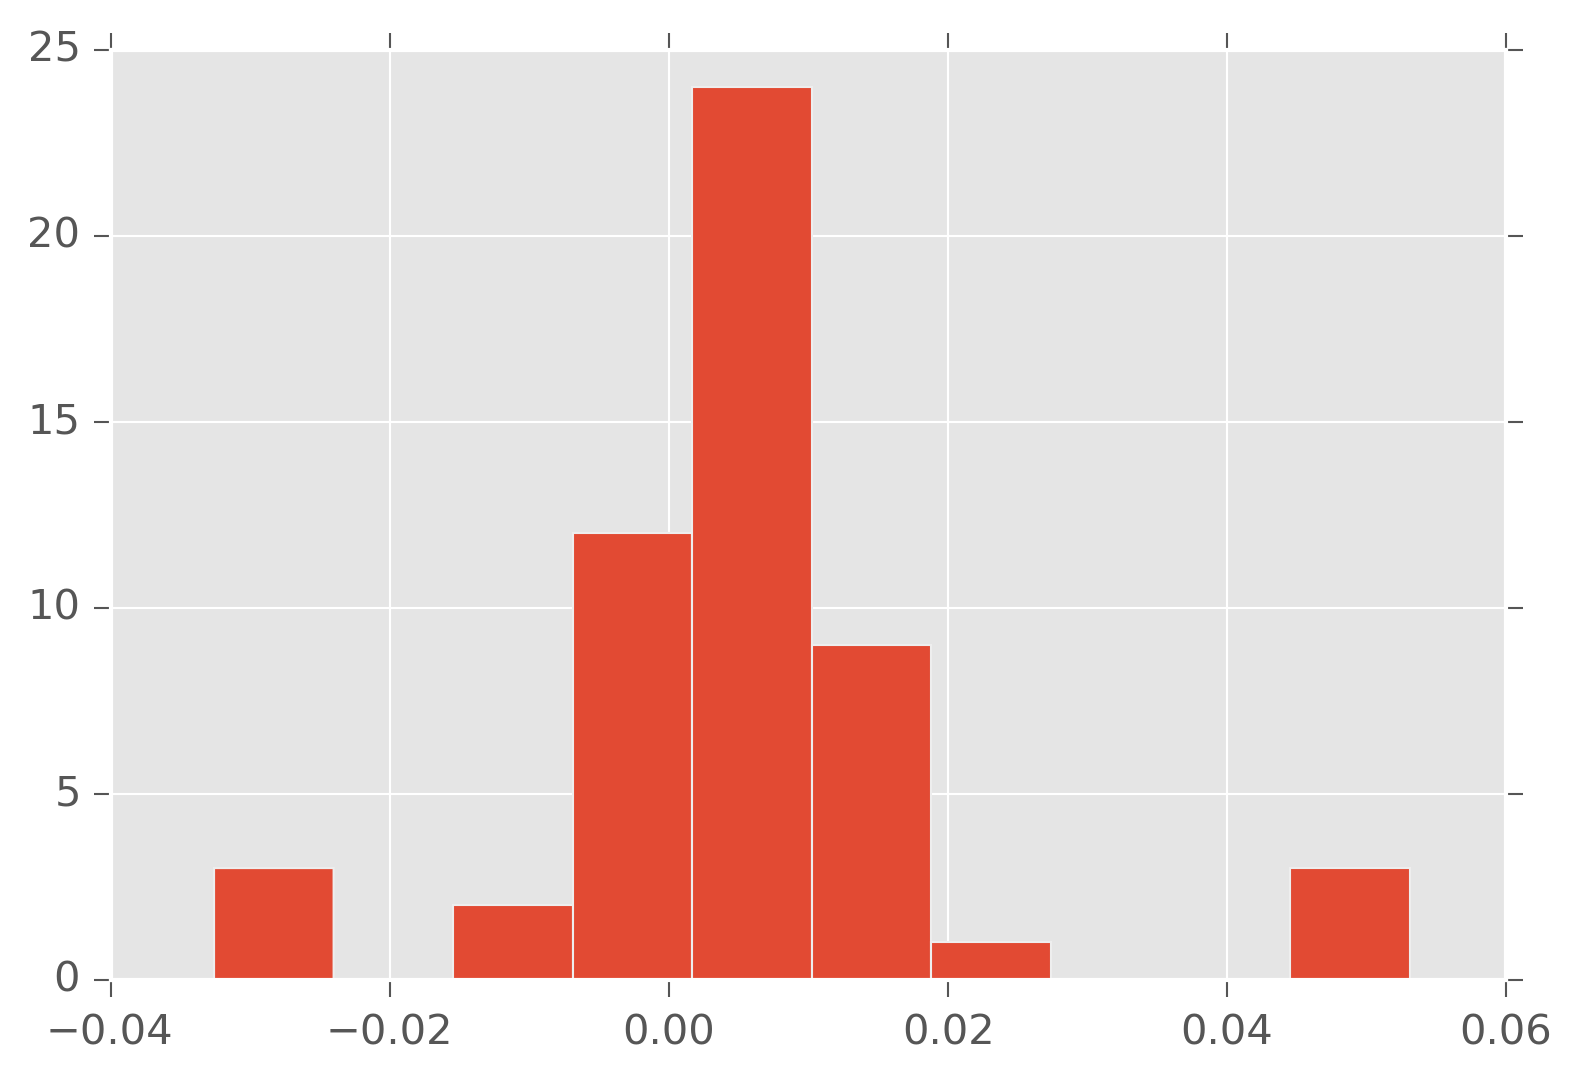

In [171]:
yeardiff.sort(ascending=False)
yeardiff.hist()

In [174]:
yeardiff.head(10)

ltwiki         0.053127
jawiki         0.047647
etwiki         0.045830
slwiki         0.021881
tlwiki         0.016346
kowiki         0.013754
fiwiki         0.013299
commonswiki    0.011965
fawiki         0.011720
hewiki         0.011705
dtype: float64

In [162]:
def trend(langseries):
    result = ols(y=langseries, x=ldf['dayssince'])
    return result.beta[0]

In [163]:
trends = langdf.apply(lambda x: trend(x), axis=0)

In [164]:
trends.sort(ascending=False)
trends

ltwiki         0.000118
specieswiki    0.000090
jawiki         0.000056
etwiki         0.000055
mkwiki         0.000051
kowiki         0.000031
slwiki         0.000026
tlwiki         0.000018
cawiki         0.000017
commonswiki    0.000017
fawiki         0.000016
fiwiki         0.000015
trwiki         0.000015
eswiki         0.000014
hrwiki         0.000013
...
mgwiki        -0.000001
plwikiquote   -0.000002
plwiki        -0.000002
arwiki        -0.000003
dawiki        -0.000004
mswiki        -0.000004
ukwiki        -0.000006
glwiki        -0.000006
hywiki        -0.000006
enwikiquote   -0.000007
ocwiki        -0.000017
zhwiki        -0.000017
thwiki        -0.000026
azwiki        -0.000027
NaN           -0.000044
Length: 62, dtype: float64